In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

from the above , we have 50000 images for train set and 10000 images for test set

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)
y_test[9]

1

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])



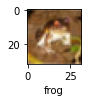

In [22]:
plot_sample(x_train, y_train, 0)

### normalizing the data

In [23]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Build simple artificial neural network for image classification

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])
ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.8627 - accuracy: 0.3340
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.6577 - accuracy: 0.4119
Epoch 3/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.5674 - accuracy: 0.4472
Epoch 4/5
1563/1563 [==============================] - 138s 89ms/step - loss: 1.5065 - accuracy: 0.4686
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4563 - accuracy: 0.4861


the accuracy can be seen to be 48.61%

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report :\n", classification_report(y_test, y_pred_classes))

Classification Report :
               precision    recall  f1-score   support

           0       0.46      0.66      0.54      1000
           1       0.61      0.60      0.60      1000
           2       0.33      0.40      0.36      1000
           3       0.34      0.37      0.36      1000
           4       0.42      0.38      0.39      1000
           5       0.54      0.22      0.31      1000
           6       0.44      0.68      0.53      1000
           7       0.66      0.42      0.52      1000
           8       0.61      0.62      0.62      1000
           9       0.60      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



### Now let us build a convolutional neural network to train our images

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation ='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])

In [32]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4616 - accuracy: 0.4719
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1070 - accuracy: 0.6083
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9804 - accuracy: 0.6570
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9000 - accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8328 - accuracy: 0.7102
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7811 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7330 - accuracy: 0.7448
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6899 - accuracy: 0.7612
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6579 - accuracy: 0.7708
Epoch 10/10
1563/1563 [==============================] - 62s 40m

With CNN, at the end 5 epochs, accuracy was at around 71.02% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features


In [35]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9540 - accuracy: 0.6917


[0.9539900422096252, 0.6916999816894531]

In [36]:
y_pred = cnn.predict(x_test)

In [37]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [38]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.85      0.75      0.80      1000
           2       0.63      0.56      0.59      1000
           3       0.51      0.49      0.50      1000
           4       0.63      0.62      0.63      1000
           5       0.57      0.66      0.61      1000
           6       0.76      0.77      0.76      1000
           7       0.74      0.76      0.75      1000
           8       0.84      0.73      0.78      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

